In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
Ames_Housing=pd.read_csv("Ames_Housing_Data.csv")

In [6]:
def explore_dataframe(df, name="DataFrame"): #user defined function to get the shape,info and description of the dataset
    print(f"\n===== {name} Overview =====")
    
    print("\nShape:")
    print(df.shape)
    
    print("\nInfo:")
    print("-" * 40)
    df.info()
    
    print("\nDescription:")
    print("-" * 40)
    print(df.describe(include='all'))

In [7]:
explore_dataframe(Ames_Housing, name="Ames Dataset") #calling the function


===== Ames Dataset Overview =====

Shape:
(2930, 81)

Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg

In [9]:
Ames_Housing.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [8]:
Ames_Housing.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [11]:
# Calculate missing percentages
missing_percentage = (Ames_Housing.isnull().sum() / len(Ames_Housing)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))

Pool QC         99.556314
Misc Feature    96.382253
Alley           93.242321
Fence           80.477816
Mas Vnr Type    60.580205
                  ...    
MS SubClass      0.000000
Central Air      0.000000
1st Flr SF       0.000000
2nd Flr SF       0.000000
SalePrice        0.000000
Length: 81, dtype: float64


In [13]:
def input_missing_values(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if pd.api.types.is_numeric_dtype(df[col]):
                # If numeric, fill missing values with the median
                df[col].fillna(df[col].median(), inplace=True)
            elif pd.api.types.is_object_dtype(df[col]):
                # If categorical, fill missing values with the mode
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif pd.api.types.is_datetime64_any_dtype(df[col]):
                # If date column, fill missing dates with the most frequent date or median
                df[col].fillna(df[col].mode()[0], inplace=True)
                
    return df

# Assuming df is your DataFrame
Ames_Housing_cleaned = input_missing_values(Ames_Housing)



# Calculate missing percentages
missing_percentage = (Ames_Housing_cleaned.isnull().sum() / len(Ames_Housing_cleaned)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))


PID              0.0
Central Air      0.0
Garage Yr Blt    0.0
Garage Type      0.0
Fireplace Qu     0.0
                ... 
Mas Vnr Area     0.0
Mas Vnr Type     0.0
Exterior 2nd     0.0
Exterior 1st     0.0
SalePrice        0.0
Length: 81, dtype: float64


## Feature Engineering

In [16]:


# Copy the original data to avoid modifying it directly
df = Ames_Housing.copy()

# 1. Total Bathrooms (including basement baths, weighted)
df['TotalBath'] = (df['Full Bath'] + 0.5 * df['Half Bath'] +
                   df['Bsmt Full Bath'] + 0.5 * df['Bsmt Half Bath'])

# 2. House Age at Sale
df['HouseAge'] = df['Yr Sold'] - df['Year Built']

# 3. Years Since Remodel
df['RemodAge'] = df['Yr Sold'] - df['Year Remod/Add']

# 4. Total Square Footage (above ground + basement)
df['TotalSF'] = df['1st Flr SF'] + df['2nd Flr SF'] + df['Total Bsmt SF']

# 5. Total Porch Area
df['TotalPorchSF'] = (df['Open Porch SF'] + df['Enclosed Porch'] +
                      df['3Ssn Porch'] + df['Screen Porch'])

# 6. Was the house remodeled?
df['IsRemodeled'] = (df['Year Built'] != df['Year Remod/Add']).astype(int)

# 7. Does the house have a garage?
df['HasGarage'] = (df['Garage Area'] > 0).astype(int)




# 10. Binning Year Built into Decades
df['DecadeBuilt'] = (df['Year Built'] // 10) * 10

# 11. Grouping rare neighborhoods
neigh_counts = df['Neighborhood'].value_counts()
rare_neigh = neigh_counts[neigh_counts < 50].index
df['NeighborhoodGrouped'] = df['Neighborhood'].apply(lambda x: 'Other' if x in rare_neigh else x)

# 12. One-hot encode NeighborhoodGrouped
df = pd.get_dummies(df, columns=['NeighborhoodGrouped'], drop_first=True)

# Preview engineered dataset
df[['TotalBath', 'HouseAge', 'RemodAge', 'TotalSF', 'TotalPorchSF',
    'IsRemodeled', 'HasGarage', 'DecadeBuilt'] + 
   [col for col in df.columns if col.startswith('NeighborhoodGrouped_')]].head()


,TotalBath,HouseAge,RemodAge,TotalSF,TotalPorchSF,IsRemodeled,HasGarage,DecadeBuilt,NeighborhoodGrouped_CollgCr,NeighborhoodGrouped_Crawfor,...,NeighborhoodGrouped_NWAmes,NeighborhoodGrouped_NoRidge,NeighborhoodGrouped_NridgHt,NeighborhoodGrouped_OldTown,NeighborhoodGrouped_Other,NeighborhoodGrouped_Sawyer,NeighborhoodGrouped_SawyerW,NeighborhoodGrouped_Somerst,NeighborhoodGrouped_StoneBr,NeighborhoodGrouped_Timber
0,2.0,50,50,2736.0,62,0,1,1960,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.0,49,49,1778.0,120,0,1,1960,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.5,52,52,2658.0,36,0,1,1950,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.5,42,42,4220.0,0,0,1,1960,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.5,13,12,2557.0,34,1,1,1990,False,False,...,False,False,False,False,False,False,False,False,False,False


## Hypothesis Testing

 ### Hypothesis 1: Total Square Footage Affects Sale Price

Null Hypothesis (H₀): There is no difference in sale prices between homes with above-median and below-median TotalSF.
Alternative Hypothesis (H₁): Homes with above-median TotalSF have higher sale prices.

In [17]:
from scipy import stats

# Median split
median_sf = df['TotalSF'].median()
group_high_sf = df[df['TotalSF'] > median_sf]['SalePrice']
group_low_sf = df[df['TotalSF'] <= median_sf]['SalePrice']

# Independent t-test
t_stat1, p_val1 = stats.ttest_ind(group_high_sf, group_low_sf)
print("Hypothesis 1 - TotalSF t-test:")
print(f"T-statistic: {t_stat1:.4f}, P-value: {p_val1:.4f}")


Hypothesis 1 - TotalSF t-test:
T-statistic: 41.8467, P-value: 0.0000


## Hypothesis 2: More Bathrooms Lead to Higher Prices

H₀: Homes with more than 2 bathrooms don’t have significantly different prices than those with 2 or fewer.
H₁: Homes with more than 2 bathrooms have higher sale prices.

In [18]:
group_more_bath = df[df['TotalBath'] > 2]['SalePrice']
group_fewer_bath = df[df['TotalBath'] <= 2]['SalePrice']

t_stat2, p_val2 = stats.ttest_ind(group_more_bath, group_fewer_bath)
print("Hypothesis 2 - TotalBath t-test:")
print(f"T-statistic: {t_stat2:.4f}, P-value: {p_val2:.4f}")


Hypothesis 2 - TotalBath t-test:
T-statistic: 36.7966, P-value: 0.0000


## Hypothesis 3: Neighborhood Affects Price

In [19]:
# Get mean prices per neighborhood
neigh_price = df.groupby('Neighborhood')['SalePrice'].mean()
high_price_neigh = neigh_price[neigh_price > neigh_price.mean()].index

group_high_neigh = df[df['Neighborhood'].isin(high_price_neigh)]['SalePrice']
group_other_neigh = df[~df['Neighborhood'].isin(high_price_neigh)]['SalePrice']

t_stat3, p_val3 = stats.ttest_ind(group_high_neigh, group_other_neigh)
print("Hypothesis 3 - Neighborhood t-test:")
print(f"T-statistic: {t_stat3:.4f}, P-value: {p_val3:.4f}")


Hypothesis 3 - Neighborhood t-test:
T-statistic: 40.3637, P-value: 0.0000


## Visualizations

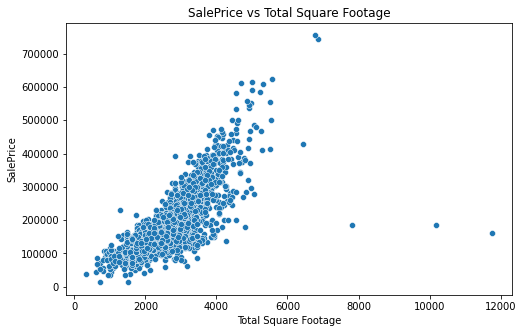

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TotalSF', y='SalePrice')
plt.title('SalePrice vs Total Square Footage')
plt.xlabel('Total Square Footage')
plt.ylabel('SalePrice')
plt.show()


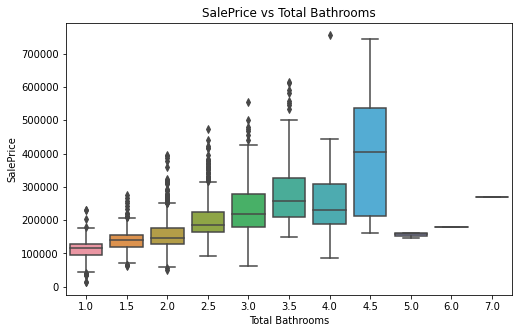

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='TotalBath', y='SalePrice')
plt.title('SalePrice vs Total Bathrooms')
plt.xlabel('Total Bathrooms')
plt.ylabel('SalePrice')
plt.show()


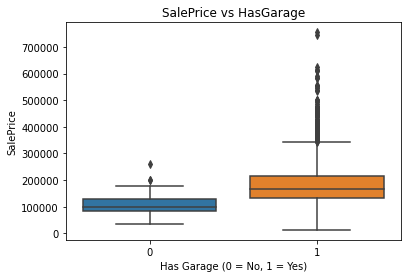

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='HasGarage', y='SalePrice')
plt.title('SalePrice vs HasGarage')
plt.xlabel('Has Garage (0 = No, 1 = Yes)')
plt.ylabel('SalePrice')
plt.show()


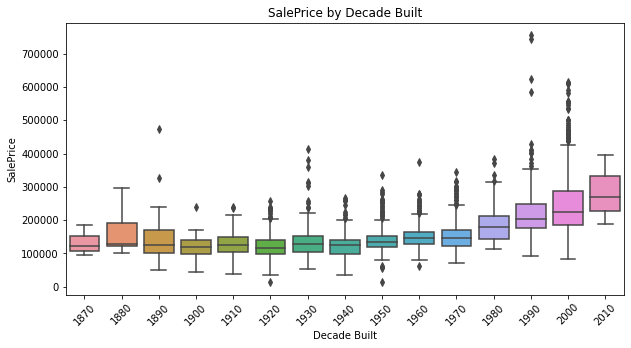

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='DecadeBuilt', y='SalePrice')
plt.xticks(rotation=45)
plt.title('SalePrice by Decade Built')
plt.xlabel('Decade Built')
plt.ylabel('SalePrice')
plt.show()


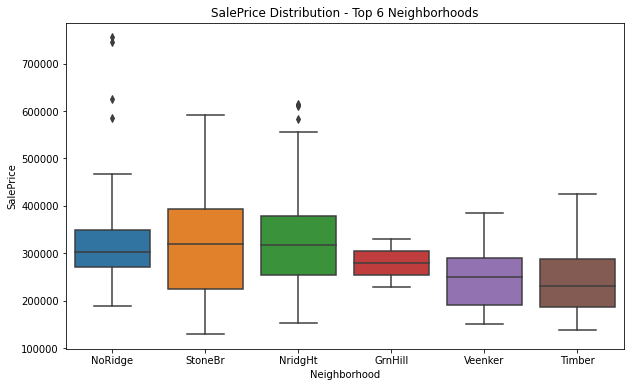

In [39]:
# Filter the DataFrame for only the top 6 neighborhoods
# Calculate average SalePrice by Neighborhood
top6_neighborhoods = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).head(6)


top6_names = top6_neighborhoods.index
df_top6 = df[df['Neighborhood'].isin(top6_names)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top6, x='Neighborhood', y='SalePrice', order=top6_names)
plt.title('SalePrice Distribution - Top 6 Neighborhoods')
plt.ylabel('SalePrice')
plt.xlabel('Neighborhood')
plt.show()



# Model

In [24]:
# Assuming you already have a DataFrame X with all predictors
import pandas as pd

# Example: selecting relevant features from your engineered dataset
X = df[['TotalSF', 'TotalBath'] + [col for col in df.columns if col.startswith('NeighborhoodGrouped_')]]

# Add constant for intercept in OLS model
import statsmodels.api as sm
X_clean = sm.add_constant(X)

# Convert boolean columns to integers
X_clean = X_clean.astype({col: int for col in X_clean.select_dtypes('bool').columns})


In [25]:
y_clean = df['SalePrice']
model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     528.2
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        15:34:39   Log-Likelihood:                -35045.
No. Observations:                2930   AIC:                         7.013e+04
Df Residuals:                    2910   BIC:                         7.025e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
import statsmodels.api as sm

# Fit the model
model = sm.OLS(y_clean, X_clean).fit()

# Fitted values (predicted SalePrice)
fitted_vals = model.fittedvalues

# Residuals (actual - predicted)
residuals = model.resid



0       47241.022165
1        -645.401433
2       15283.252943
3      -19275.188321
4       -1457.520551
            ...     
2925     3805.030500
2926     4283.817985
2927     6643.195546
2928    -7226.735912
2929    -7256.592723
Length: 2930, dtype: float64


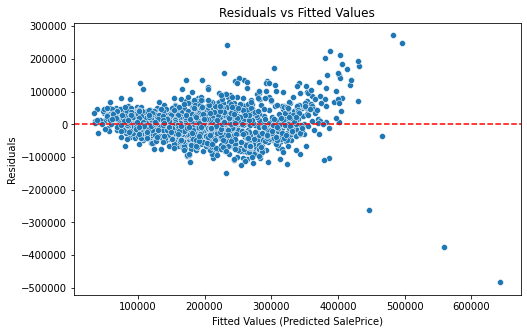

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values (Predicted SalePrice)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


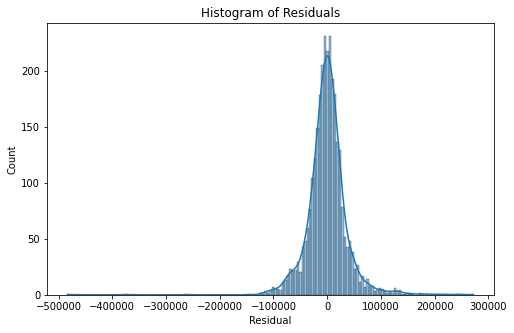

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.show()


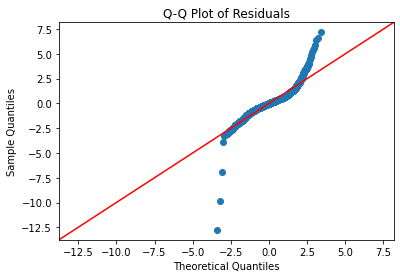

In [31]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()
